In [ ]:
# Import necessary libraries for data preprocessing and model building
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
#Loading data into dataframe

data = pd.read_csv("merged_suicide_gdp_unemployment_poverty.csv")
data.head()

,Country,source.label,indicator.label,sex.label,classif1.label,Year,Working_Poverty_Rate,Country_Code,Poverty_Rate,IND_ID,...,DIM_GEO_CODE_M49,DIM_GEO_CODE_TYPE,DIM_PUBLISH_STATE_CODE,IND_NAME,GEO_NAME_SHORT,DIM_SEX,DIM_AGE,RATE_PER_100000_N,RATE_PER_100000_NL,RATE_PER_100000_NU
0,Afghanistan,ILO - Modelled Estimates,SDG indicator 1.1.1 - Working poverty rate (pe...,Sex: Total,"Age (Youth, adults): 15+",2023.0,34.937,AFG,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,ILO - Modelled Estimates,SDG indicator 1.1.1 - Working poverty rate (pe...,Sex: Total,"Age (Youth, adults): 15+",2022.0,22.967,AFG,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,ILO - Modelled Estimates,SDG indicator 1.1.1 - Working poverty rate (pe...,Sex: Total,"Age (Youth, adults): 15+",2021.0,9.964,AFG,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,ILO - Modelled Estimates,SDG indicator 1.1.1 - Working poverty rate (pe...,Sex: Total,"Age (Youth, adults): 15+",2020.0,10.861,AFG,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,ILO - Modelled Estimates,SDG indicator 1.1.1 - Working poverty rate (pe...,Sex: Total,"Age (Youth, adults): 15+",2019.0,10.270,AFG,NaN,16BBF41SDGSUICIDE,...,4.0,COUNTRY,PUBLISHED,Suicide deaths,Afghanistan,MALE,TOTAL,4.63,2.62,7.93


In [ ]:
#Shape of dataframe

data.shape

(26397, 25)

In [ ]:
#Listing the features of the dataset

data.columns

Index(['Country', 'source.label', 'indicator.label', 'sex.label',
       'classif1.label', 'Year', 'Working_Poverty_Rate', 'Country_Code',
       'Poverty_Rate', 'IND_ID', 'IND_CODE', 'IND_UUID', 'IND_PER_CODE',
       'DIM_TIME', 'DIM_TIME_TYPE', 'DIM_GEO_CODE_M49', 'DIM_GEO_CODE_TYPE',
       'DIM_PUBLISH_STATE_CODE', 'IND_NAME', 'GEO_NAME_SHORT', 'DIM_SEX',
       'DIM_AGE', 'RATE_PER_100000_N', 'RATE_PER_100000_NL',
       'RATE_PER_100000_NU'],
      dtype='object')

In [ ]:
#Renaming the columns names for convinience
# Renaming the columns for better clarity and understanding
data.rename(columns={
    'Country': 'Country',
    'source.label': 'Source_Label',
    'indicator.label': 'Indicator_Label',
    'sex.label': 'Sex_Label',
    'classif1.label': 'Classification_Label',
    'Year': 'Year',
    'Working_Poverty_Rate': 'Working_Poverty_Rate',
    'Country_Code': 'Country_Code',
    'Poverty_Rate': 'Poverty_Rate',
    'IND_ID': 'Indicator_ID',
    'IND_CODE': 'Indicator_Code',
    'IND_UUID': 'Indicator_UUID',
    'IND_PER_CODE': 'Indicator_Period_Code',
    'DIM_TIME': 'Time',
    'DIM_TIME_TYPE': 'Time_Type',
    'DIM_GEO_CODE_M49': 'Geo_Code_M49',
    'DIM_GEO_CODE_TYPE': 'Geo_Code_Type',
    'DIM_PUBLISH_STATE_CODE': 'Publish_State_Code',
    'IND_NAME': 'Indicator_Name',
    'GEO_NAME_SHORT': 'Country_Short_Name',
    'DIM_SEX': 'Sex',
    'DIM_AGE': 'Age_Group',
    'RATE_PER_100000_N': 'Suicide_Rate_Per_100K',
    'RATE_PER_100000_NL': 'Suicide_Rate_Lower_Bound',
    'RATE_PER_100000_NU': 'Suicide_Rate_Upper_Bound'
}, inplace=True)

# Display the renamed columns to verify
print(data.columns)


Index(['Country', 'Source_Label', 'Indicator_Label', 'Sex_Label',
       'Classification_Label', 'Year', 'Working_Poverty_Rate', 'Country_Code',
       'Poverty_Rate', 'Indicator_ID', 'Indicator_Code', 'Indicator_UUID',
       'Indicator_Period_Code', 'Time', 'Time_Type', 'Geo_Code_M49',
       'Geo_Code_Type', 'Publish_State_Code', 'Indicator_Name',
       'Country_Short_Name', 'Sex', 'Age_Group', 'Suicide_Rate_Per_100K',
       'Suicide_Rate_Lower_Bound', 'Suicide_Rate_Upper_Bound'],
      dtype='object')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26397 entries, 0 to 26396
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   26397 non-null  object 
 1   Source_Label              26397 non-null  object 
 2   Indicator_Label           26396 non-null  object 
 3   Sex_Label                 26396 non-null  object 
 4   Classification_Label      26396 non-null  object 
 5   Year                      26396 non-null  float64
 6   Working_Poverty_Rate      26396 non-null  float64
 7   Country_Code              15236 non-null  object 
 8   Poverty_Rate              4835 non-null   float64
 9   Indicator_ID              26042 non-null  object 
 10  Indicator_Code            26042 non-null  object 
 11  Indicator_UUID            26042 non-null  object 
 12  Indicator_Period_Code     26042 non-null  object 
 13  Time                      26042 non-null  float64
 14  Time_T

In [ ]:
# now handling the not null values

#Numerical Imputation: For columns like Poverty Rate and Suicide Rate, missing values are filled using the mean.
#Categorical Imputation: For columns like Country_Code and Sex, missing values are filled using the most frequent value (mode).
#After applying the imputation, we check for any remaining missing values to ensure they have been handled



from sklearn.impute import SimpleImputer

# Step 1: Create imputers for numerical and categorical columns
numerical_imputer = SimpleImputer(strategy='mean')  # For numerical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')  # For categorical columns

# Step 2: Apply imputation on numerical columns
numerical_columns = ['Poverty_Rate', 'Suicide_Rate_Per_100K', 'Suicide_Rate_Lower_Bound', 'Suicide_Rate_Upper_Bound']
data[numerical_columns] = numerical_imputer.fit_transform(data[numerical_columns])

# Step 3: Apply imputation on categorical columns
categorical_columns = ['Country_Code', 'Sex', 'Age_Group', 'Country_Short_Name']
data[categorical_columns] = categorical_imputer.fit_transform(data[categorical_columns])

# Step 4: Verify that there are no missing values left
print(data.isnull().sum())


Country                       0
Source_Label                  0
Indicator_Label               1
Sex_Label                     1
Classification_Label          1
Year                          1
Working_Poverty_Rate          1
Country_Code                  0
Poverty_Rate                  0
Indicator_ID                355
Indicator_Code              355
Indicator_UUID              355
Indicator_Period_Code       355
Time                        355
Time_Type                   355
Geo_Code_M49                355
Geo_Code_Type               355
Publish_State_Code          355
Indicator_Name              355
Country_Short_Name            0
Sex                           0
Age_Group                     0
Suicide_Rate_Per_100K         0
Suicide_Rate_Lower_Bound      0
Suicide_Rate_Upper_Bound      0
dtype: int64


In [ ]:
# Dropping unnecessary columns that won't help in the analysis or modeling
columns_to_drop = [
    'Indicator_ID', 'Indicator_Code', 'Indicator_UUID', 'Indicator_Period_Code',
    'Time', 'Time_Type', 'Geo_Code_M49', 'Geo_Code_Type', 'Publish_State_Code', 'Indicator_Name'
]

# Dropping the columns
data = data.drop(columns=columns_to_drop)

# Display the updated dataset columns
print(data.columns)


Index(['Country', 'Source_Label', 'Indicator_Label', 'Sex_Label',
       'Classification_Label', 'Year', 'Working_Poverty_Rate', 'Country_Code',
       'Poverty_Rate', 'Country_Short_Name', 'Sex', 'Age_Group',
       'Suicide_Rate_Per_100K', 'Suicide_Rate_Lower_Bound',
       'Suicide_Rate_Upper_Bound'],
      dtype='object')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26397 entries, 0 to 26396
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   26397 non-null  object 
 1   Source_Label              26397 non-null  object 
 2   Indicator_Label           26396 non-null  object 
 3   Sex_Label                 26396 non-null  object 
 4   Classification_Label      26396 non-null  object 
 5   Year                      26396 non-null  float64
 6   Working_Poverty_Rate      26396 non-null  float64
 7   Country_Code              26397 non-null  object 
 8   Poverty_Rate              26397 non-null  float64
 9   Country_Short_Name        26397 non-null  object 
 10  Sex                       26397 non-null  object 
 11  Age_Group                 26397 non-null  object 
 12  Suicide_Rate_Per_100K     26397 non-null  float64
 13  Suicide_Rate_Lower_Bound  26397 non-null  float64
 14  Suicid

In [ ]:
#Encode Categorical Variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Step 1: Label Encoding for Sex and Age_Group
label_encoder = LabelEncoder()

# Encoding Sex
data['Sex'] = label_encoder.fit_transform(data['Sex'])

# Encoding Age Group
data['Age_Group'] = label_encoder.fit_transform(data['Age_Group'])

# Step 2: One-Hot Encoding for Country
# One-Hot Encoding for Country
cleaned_data = pd.get_dummies(data, columns=['Country'], drop_first=True)

# Step 3: One-Hot Encoding for Country_Code if required
cleaned_data = pd.get_dummies(cleaned_data, columns=['Country_Code'], drop_first=True)

# Display the updated dataset
print(cleaned_data.head())

               Source_Label  \
0  ILO - Modelled Estimates   
1  ILO - Modelled Estimates   
2  ILO - Modelled Estimates   
3  ILO - Modelled Estimates   
4  ILO - Modelled Estimates   

                                     Indicator_Label   Sex_Label  \
0  SDG indicator 1.1.1 - Working poverty rate (pe...  Sex: Total   
1  SDG indicator 1.1.1 - Working poverty rate (pe...  Sex: Total   
2  SDG indicator 1.1.1 - Working poverty rate (pe...  Sex: Total   
3  SDG indicator 1.1.1 - Working poverty rate (pe...  Sex: Total   
4  SDG indicator 1.1.1 - Working poverty rate (pe...  Sex: Total   

       Classification_Label    Year  Working_Poverty_Rate  Poverty_Rate  \
0  Age (Youth, adults): 15+  2023.0                34.937      3.612596   
1  Age (Youth, adults): 15+  2022.0                22.967      3.612596   
2  Age (Youth, adults): 15+  2021.0                 9.964      3.612596   
3  Age (Youth, adults): 15+  2020.0                10.861      3.612596   
4  Age (Youth, adults): 15+  

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Basic Statistics:
               Year  Working_Poverty_Rate  Poverty_Rate           Sex  \
count  26396.000000          26396.000000  26397.000000  26397.000000   
mean    2017.847325             11.834168      3.612596      1.002690   
std        1.955701             16.364718      1.850306      0.810149   
min     2013.000000              0.000000      0.000000      0.000000   
25%     2017.000000              0.290250      3.612596      0.000000   
50%     2019.000000              3.394000      3.612596      1.000000   
75%     2019.000000             17.989000      3.612596      2.000000   
max     2023.000000             73.718000     65.700000      2.000000   

          Age_Group  Suicide_Rate_Per_100K  Suicide_Rate_Lower_Bound  \
count  26397.000000           26397.000000              26397.000000   
mean       3.591355              15.716910                  5.088975   
std        3.825767              34.519945                  3.296620   
min        0.000000               0.

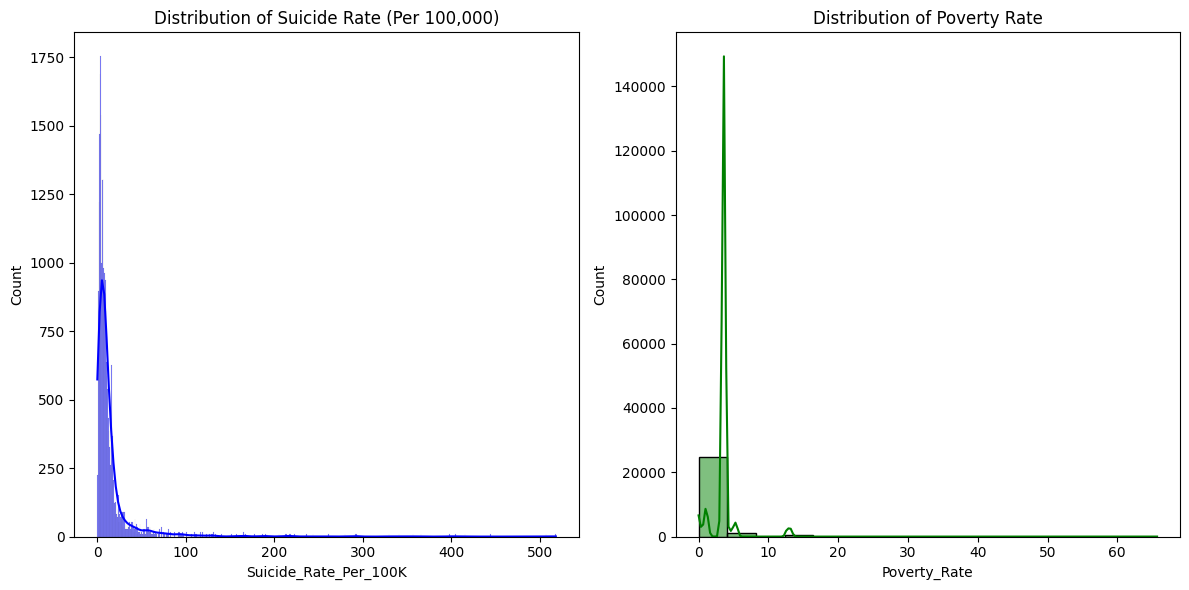

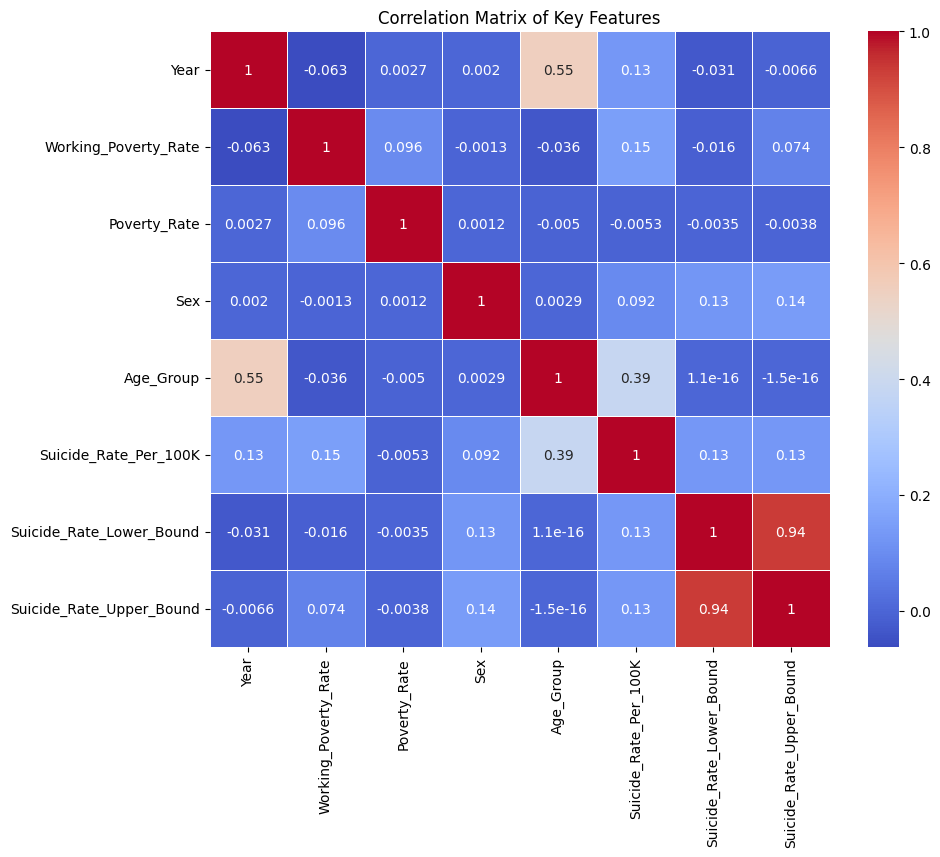

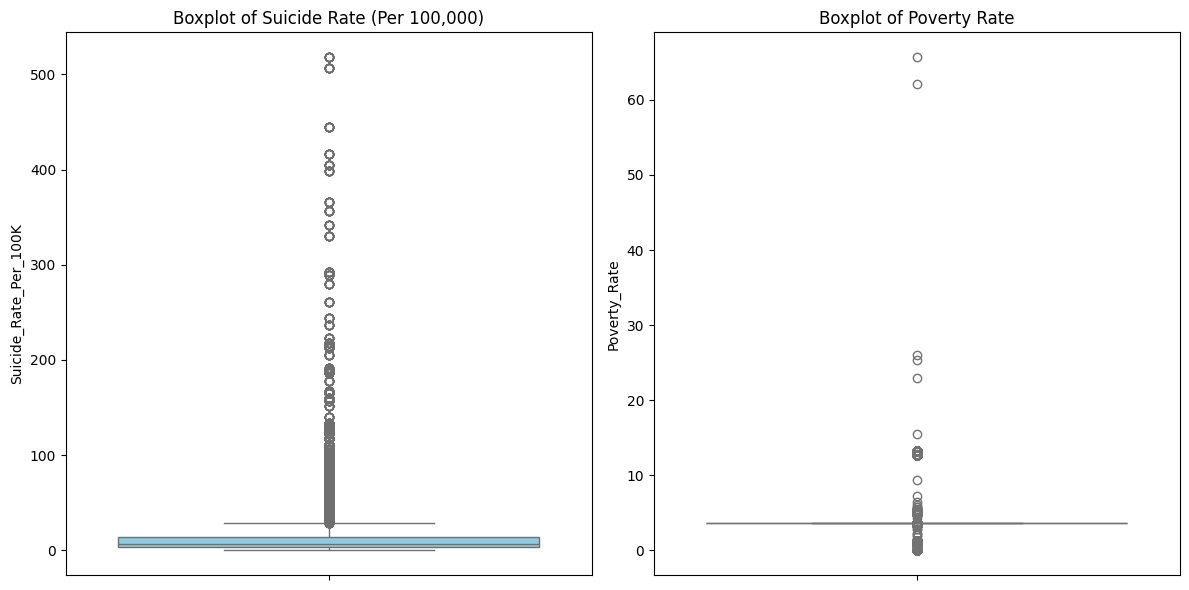

Suicide Rate and Poverty Rate by Country:
       Country Suicide_Rate_Per_100K                  Poverty_Rate
                                mean        max   min         mean
0  Afghanistan              7.260342   28.60000  2.02     3.612596
1      Albania              6.116731   26.04000  1.17     1.239248
2      Algeria              3.430016   15.71691  1.37     3.612596
3       Angola             24.368896  341.30000  1.19     3.612596
4    Argentina             10.887384   45.21000  2.91     1.934598


In [ ]:
# Step 1: Basic Statistics
# Get a summary of the numerical columns
print("Basic Statistics:")
print(data.describe())

# Step 2: Checking the distribution of key features
plt.figure(figsize=(12, 6))

# Distribution of Suicide Rate
plt.subplot(1, 2, 1)
sns.histplot(data['Suicide_Rate_Per_100K'], kde=True, color='blue')
plt.title('Distribution of Suicide Rate (Per 100,000)')

# Distribution of Poverty Rate
plt.subplot(1, 2, 2)
sns.histplot(data['Poverty_Rate'], kde=True, color='green')
plt.title('Distribution of Poverty Rate')

plt.tight_layout()
plt.show()

# Step 3: Correlation Matrix
# Calculate and visualize correlations between features
numeric_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
corr_matrix = numeric_data.corr()

# Plotting the correlation matrix heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Key Features')
plt.show()

# Step 4: Boxplots to check for outliers
plt.figure(figsize=(12, 6))

# Boxplot of Suicide Rate
plt.subplot(1, 2, 1)
sns.boxplot(y=data['Suicide_Rate_Per_100K'], color='skyblue')
plt.title('Boxplot of Suicide Rate (Per 100,000)')

# Boxplot of Poverty Rate
plt.subplot(1, 2, 2)
sns.boxplot(y=data['Poverty_Rate'], color='lightgreen')
plt.title('Boxplot of Poverty Rate')

plt.tight_layout()
plt.show()

# Step 5: Grouping data by country to observe suicide rates
country_stats = data.groupby('Country').agg({
    'Suicide_Rate_Per_100K': ['mean', 'max', 'min'],
    'Poverty_Rate': ['mean']
}).reset_index()

print("Suicide Rate and Poverty Rate by Country:")
print(country_stats.head())

<ipython-input-15-1cfeba9e4d47>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Suicide_Rate_Per_100K', data=data, ci=None)


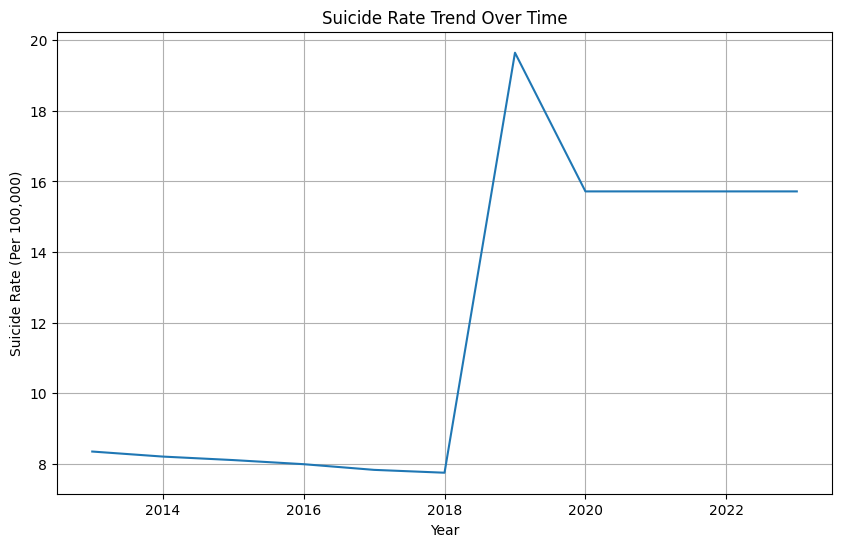

In [ ]:
#Suicide Rate Trends Over Time

# Step 6: Suicide Rate Trends Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Suicide_Rate_Per_100K', data=data, ci=None)
plt.title('Suicide Rate Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Suicide Rate (Per 100,000)')
plt.grid(True)
plt.show()


<ipython-input-16-fc6685e3c963>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sex', y='Suicide_Rate_Per_100K', data=data, palette='Set2')


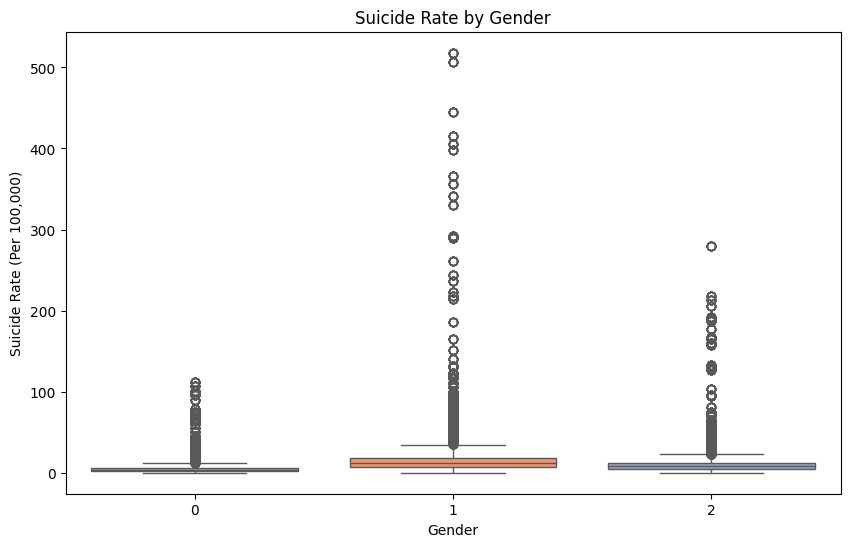

In [ ]:
# Step 7: Suicide Rate by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Suicide_Rate_Per_100K', data=data, palette='Set2')
plt.title('Suicide Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Suicide Rate (Per 100,000)')
plt.show()


<ipython-input-17-7c5961a8214c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age_Group', y='Suicide_Rate_Per_100K', data=data, palette='Set1')


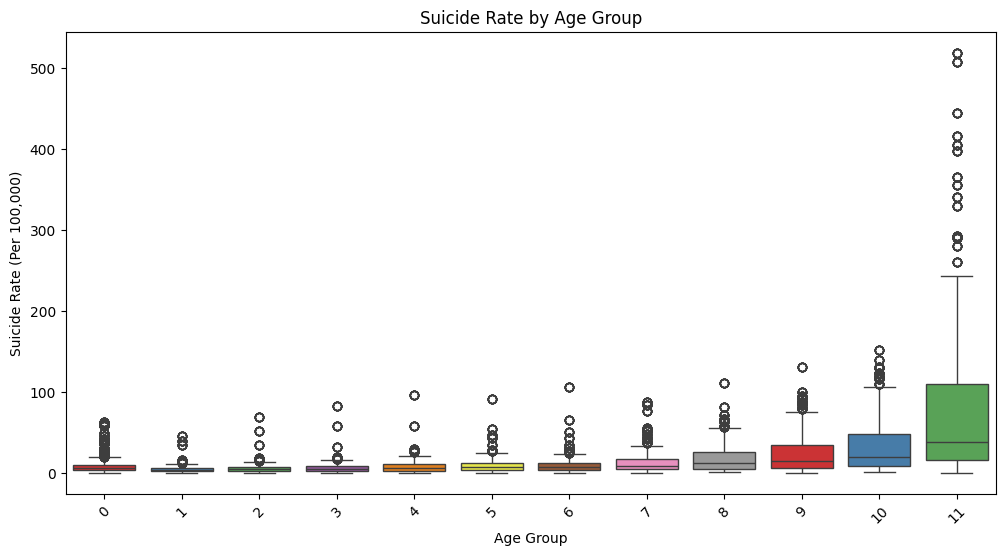

In [ ]:
# Step 8: Suicide Rate by Age Group
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age_Group', y='Suicide_Rate_Per_100K', data=data, palette='Set1')
plt.title('Suicide Rate by Age Group')
plt.xticks(rotation=45)
plt.xlabel('Age Group')
plt.ylabel('Suicide Rate (Per 100,000)')
plt.show()

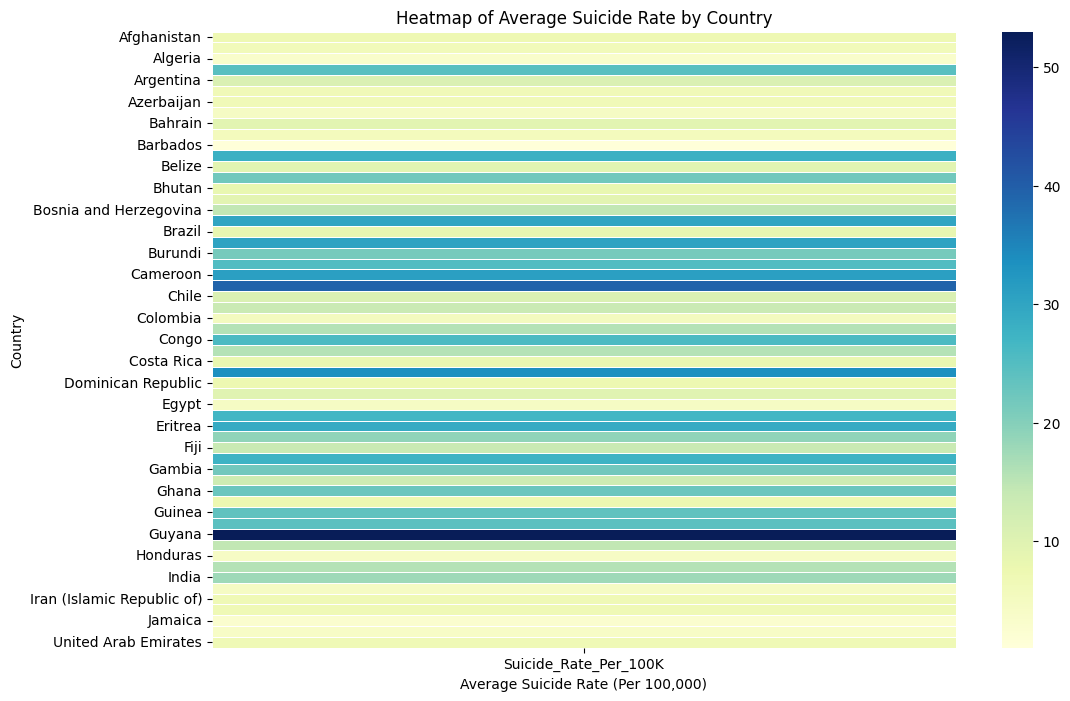

In [ ]:
# Step 9: Suicide Rate Heatmap by Country
plt.figure(figsize=(12, 8))
suicide_rate_by_country = data.groupby('Country')['Suicide_Rate_Per_100K'].mean().reset_index()
suicide_rate_by_country_pivot = suicide_rate_by_country.pivot_table(index='Country', values='Suicide_Rate_Per_100K')

sns.heatmap(suicide_rate_by_country_pivot, cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap of Average Suicide Rate by Country')
plt.ylabel('Country')
plt.xlabel('Average Suicide Rate (Per 100,000)')
plt.show()

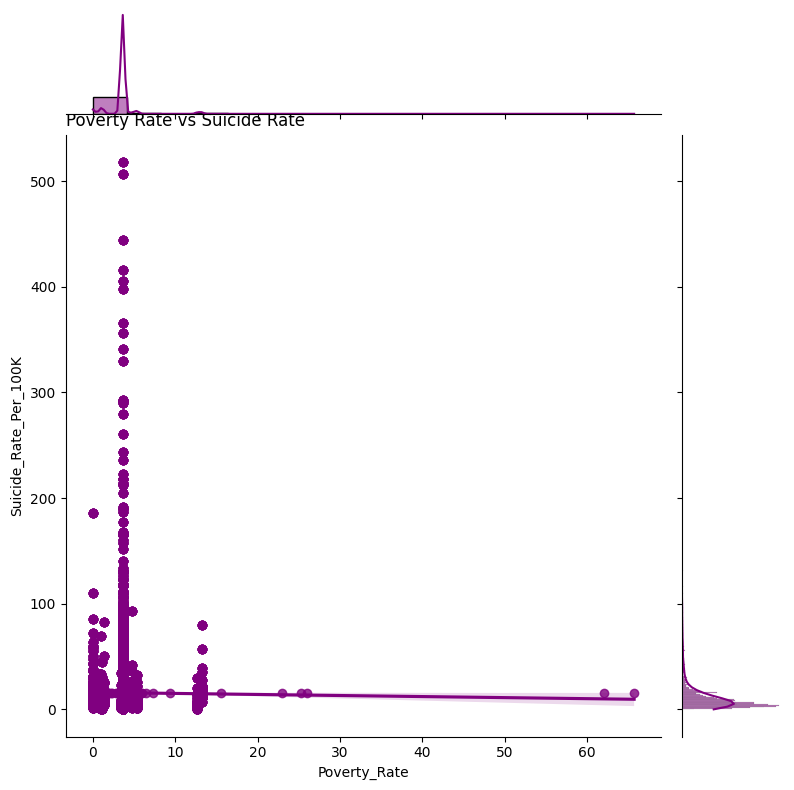

In [ ]:
# Step 10: Jointplot of Poverty Rate vs Suicide Rate
sns.jointplot(x='Poverty_Rate', y='Suicide_Rate_Per_100K', data=cleaned_data, kind='reg', height=8, color='purple')
plt.title('Poverty Rate vs Suicide Rate', loc='left')
plt.show()

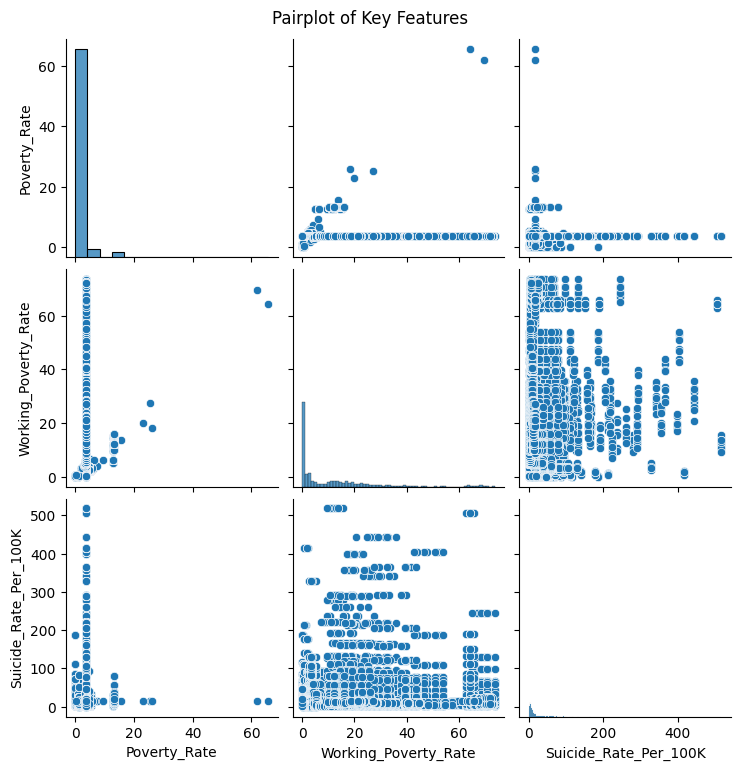

In [ ]:
# Step 11: Pairplot to visualize relationships between features
sns.pairplot(cleaned_data[['Poverty_Rate', 'Working_Poverty_Rate', 'Suicide_Rate_Per_100K']])
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

<ipython-input-21-1b862db4cab7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age_Group', y='Suicide_Rate_Per_100K', data=age_group_suicide_rate, palette='Blues_d')


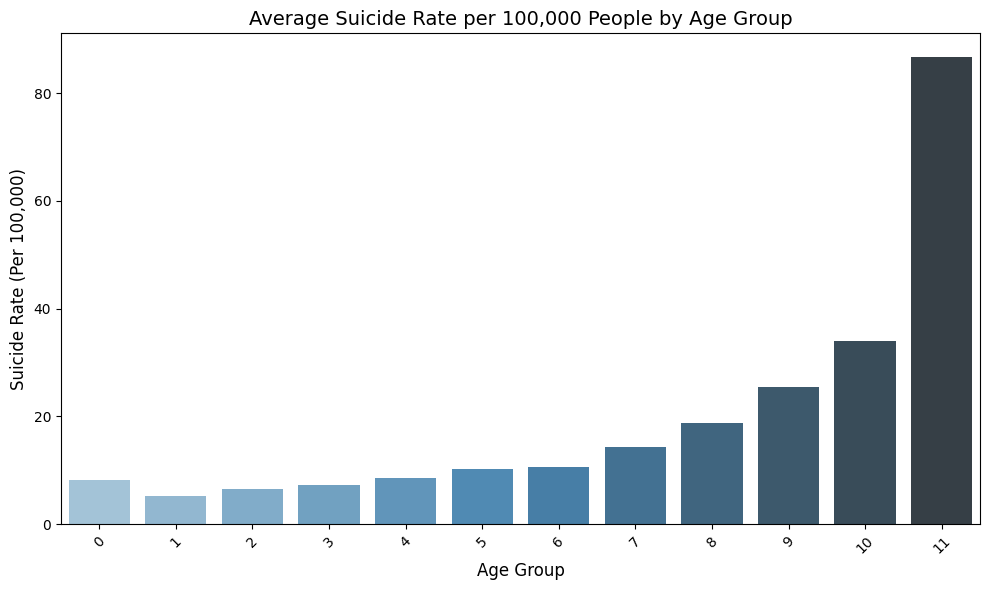

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by Age Group and calculate the mean Suicide Rate for each group
age_group_suicide_rate = cleaned_data.groupby('Age_Group')['Suicide_Rate_Per_100K'].mean().reset_index()

# Create a bar plot for Age Group and Suicide Rate
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Suicide_Rate_Per_100K', data=age_group_suicide_rate, palette='Blues_d')

# Add labels and title
plt.title('Average Suicide Rate per 100,000 People by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Suicide Rate (Per 100,000)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Install plotly
!pip install plotly

In [ ]:
!pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 42.5 MB/s eta 0:00:00


In [ ]:
import plotly.express as px
import pycountry

# Standardize country names by converting them to ISO-3 codes (needed for Plotly)
def get_iso3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None

# Apply the conversion to your 'Country' column
suicide_rate_by_country = data.groupby('Country')['Suicide_Rate_Per_100K'].mean().reset_index()
suicide_rate_by_country['iso_alpha'] = suicide_rate_by_country['Country'].apply(get_iso3)

# Drop rows where iso_alpha is None (unrecognized country names)
suicide_rate_by_country.dropna(subset=['iso_alpha'], inplace=True)

# Create the choropleth map using Plotly
fig = px.choropleth(suicide_rate_by_country,
                    locations='iso_alpha',
                    locationmode='ISO-3',
                    color='Suicide_Rate_Per_100K',
                    color_continuous_scale='OrRd',
                    title='Average Suicide Rate per 100,000 People by Country')

fig.update_geos(visible=False, resolution=50)  # Adjust resolution for smoother map
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0}) # Adjust margins
fig.show()


<Figure size 1200x800 with 0 Axes>

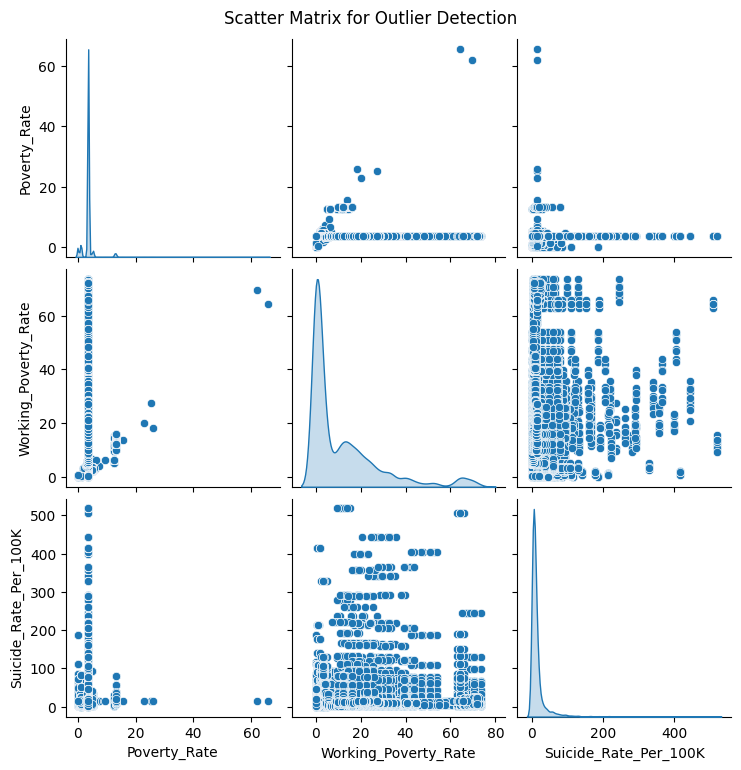

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting the numerical columns for the scatter matrix
numerical_columns = ['Poverty_Rate', 'Working_Poverty_Rate', 'Suicide_Rate_Per_100K']

# Creating the scatter matrix (pairplot)
plt.figure(figsize=(12, 8))
sns.pairplot(data[numerical_columns], diag_kind='kde')  # kde for Kernel Density Estimation on the diagonal
plt.suptitle('Scatter Matrix for Outlier Detection', y=1.02)

# Show the plot
plt.show()


In [ ]:
#checking the data for null or missing values

data.isnull().sum()

,0
Country,0
Source_Label,0
Indicator_Label,1
Sex_Label,1
Classification_Label,1
Year,1
Working_Poverty_Rate,1
Country_Code,0
Poverty_Rate,0
Country_Short_Name,0


In [ ]:
from google.colab import files
cleaned_data.to_csv('preprocessed_dataset.csv', index=False)
files.download('preprocessed_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data

,Country,Source_Label,Indicator_Label,Sex_Label,Classification_Label,Year,Working_Poverty_Rate,Country_Code,Poverty_Rate,Country_Short_Name,Sex,Age_Group,Suicide_Rate_Per_100K,Suicide_Rate_Lower_Bound,Suicide_Rate_Upper_Bound
0,Afghanistan,ILO - Modelled Estimates,SDG indicator 1.1.1 - Working poverty rate (pe...,Sex: Total,"Age (Youth, adults): 15+",2023.0,34.937,AFG,3.612596,Afghanistan,1,0,15.71691,5.088975,11.963645
1,Afghanistan,ILO - Modelled Estimates,SDG indicator 1.1.1 - Working poverty rate (pe...,Sex: Total,"Age (Youth, adults): 15+",2022.0,22.967,AFG,3.612596,Afghanistan,1,0,15.71691,5.088975,11.963645
2,Afghanistan,ILO - Modelled Estimates,SDG indicator 1.1.1 - Working poverty rate (pe...,Sex: Total,"Age (Youth, adults): 15+",2021.0,9.964,AFG,3.612596,Afghanistan,1,0,15.71691,5.088975,11.963645
3,Afghanistan,ILO - Modelled Estimates,SDG indicator 1.1.1 - Working poverty rate (pe...,Sex: Total,"Age (Youth, adults): 15+",2020.0,10.861,AFG,3.612596,Afghanistan,1,0,15.71691,5.088975,11.963645
4,Afghanistan,ILO - Modelled Estimates,SDG indicator 1.1.1 - Working poverty rate (pe...,Sex: Total,"Age (Youth, adults): 15+",2019.0,10.270,AFG,3.612596,Afghanistan,1,0,4.63000,2.620000,7.930000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26392,Jordan,ILO - Modelled Estimates,SDG indicator 1.1.1 - Working poverty rate (pe...,Sex: Male,"Age (Youth, adults): 15-24",2019.0,0.136,JOR,3.612596,Jordan,2,0,1.64000,1.060000,2.390000
26393,Jordan,ILO - Modelled Estimates,SDG indicator 1.1.1 - Working poverty rate (pe...,Sex: Male,"Age (Youth, adults): 15-24",2019.0,0.136,JOR,3.612596,Jordan,0,0,0.74200,0.478000,1.100000
26394,Jordan,ILO - Modelled Estimates,SDG indicator 1.1.1 - Working poverty rate (pe...,Sex: Male,"Age (Youth, adults): 15-24",2019.0,0.136,JOR,3.612596,Jordan,0,11,9.77000,5.088975,11.963645
26395,Jordan,ILO - Modelled Estimates,SDG indicator 1.1.1 - Working poverty rate (pe...,Sex: Male,"Age (Youth, adults): 15-24",2019.0,0.136,JOR,3.612596,Jordan,1,11,19.27000,5.088975,11.963645


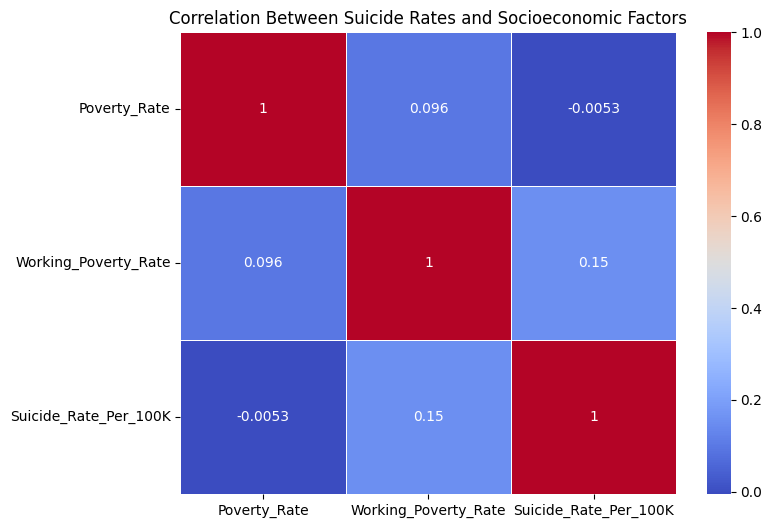

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Correlation Matrix between Suicide Rate and Socioeconomic Factors
correlation_features = ['Poverty_Rate', 'Working_Poverty_Rate', 'Suicide_Rate_Per_100K']

# Calculate the correlation matrix
correlation_matrix = cleaned_data[correlation_features].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Suicide Rates and Socioeconomic Factors')
plt.show()


<ipython-input-29-779a726f211f>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




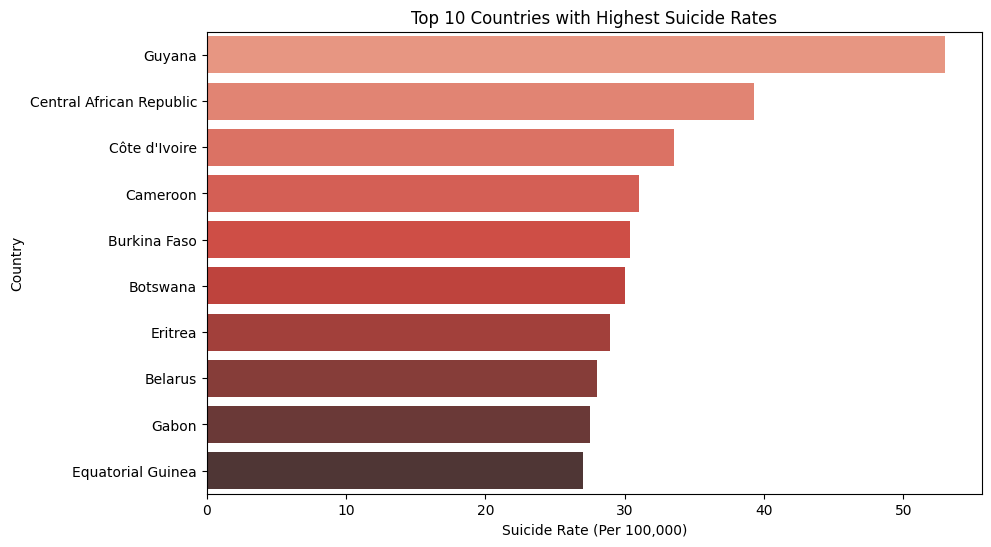

In [ ]:
# Step 2: Group data by country and calculate the mean suicide rate for each country
country_suicide_rate = data.groupby('Country')['Suicide_Rate_Per_100K'].mean().reset_index()

# Sort the countries by suicide rate
country_suicide_rate = country_suicide_rate.sort_values(by='Suicide_Rate_Per_100K', ascending=False)

# Plot suicide rates by country (top 10 high-risk countries)
plt.figure(figsize=(10, 6))
sns.barplot(x='Suicide_Rate_Per_100K', y='Country', data=country_suicide_rate.head(10), palette='Reds_d')
plt.title('Top 10 Countries with Highest Suicide Rates')
plt.xlabel('Suicide Rate (Per 100,000)')
plt.ylabel('Country')
plt.show()


<ipython-input-30-f372e05c15b7>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




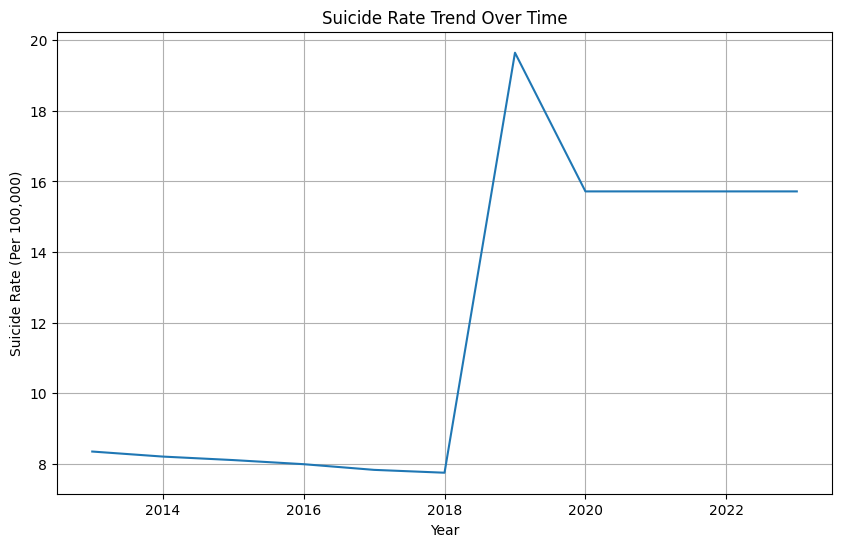

In [ ]:
# Step 3: Line plot to analyze suicide rate trends over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Suicide_Rate_Per_100K', data=cleaned_data, ci=None)
plt.title('Suicide Rate Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Suicide Rate (Per 100,000)')
plt.grid(True)
plt.show()

<ipython-input-31-f1183b59ce66>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




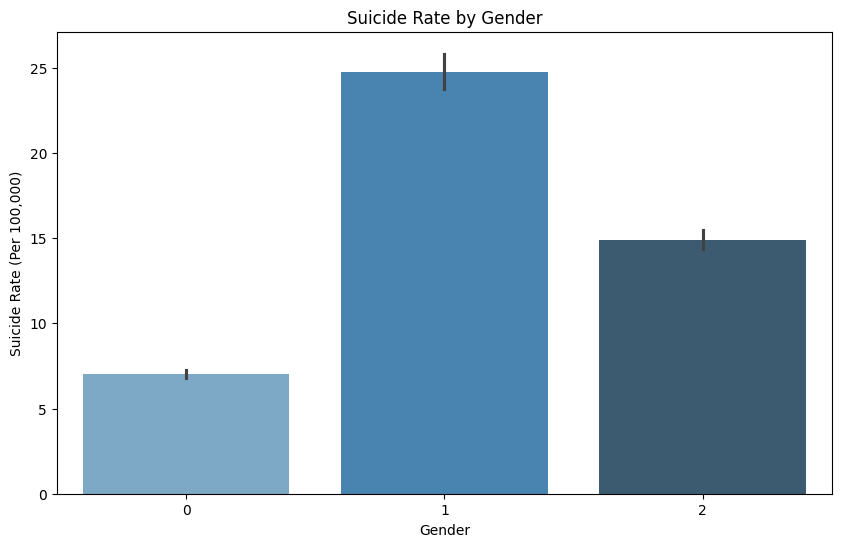

In [ ]:
# Step 4a: Bar plot for Suicide Rate by Gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Suicide_Rate_Per_100K', data=cleaned_data, palette='Blues_d')
plt.title('Suicide Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Suicide Rate (Per 100,000)')
plt.show()

<ipython-input-32-6d0c8a8621c9>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




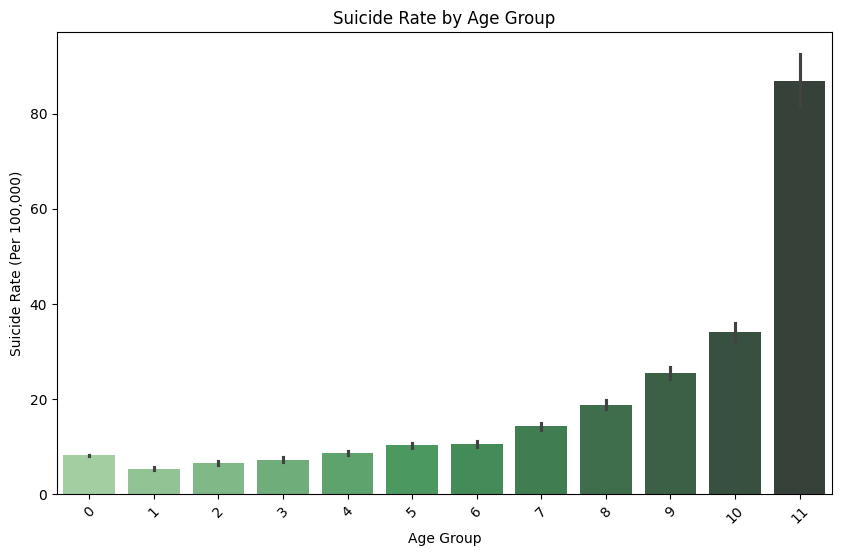

In [ ]:
# Step 4b: Bar plot for Suicide Rate by Age Group
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Suicide_Rate_Per_100K', data=cleaned_data, palette='Greens_d')
plt.title('Suicide Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Suicide Rate (Per 100,000)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
data.columns

Index(['Country', 'Source_Label', 'Indicator_Label', 'Sex_Label',
       'Classification_Label', 'Year', 'Working_Poverty_Rate', 'Country_Code',
       'Poverty_Rate', 'Country_Short_Name', 'Sex', 'Age_Group',
       'Suicide_Rate_Per_100K', 'Suicide_Rate_Lower_Bound',
       'Suicide_Rate_Upper_Bound'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 1: One-Hot Encode Categorical Features (Country, Sex, Age_Group)
categorical_columns = ['Country', 'Sex', 'Age_Group']

# Check if columns exist in DataFrame before encoding
for col in categorical_columns:
    if col not in data.columns:
        raise KeyError(f"Column '{col}' not found in cleaned_data DataFrame.")

# Apply One-Hot Encoding to categorical features
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid dummy variable trap
encoded_categorical = onehot_encoder.fit_transform(data[categorical_columns])

# Convert the encoded features to a DataFrame
encoded_df = pd.DataFrame(encoded_categorical, columns=onehot_encoder.get_feature_names_out(categorical_columns))

# Step 2: Merge with the original dataset (excluding the original categorical columns)
numerical_columns = ['Poverty_Rate', 'Working_Poverty_Rate']
final_data = pd.concat([data[numerical_columns], encoded_df], axis=1)

# Step 3: Split Features (X) and Target (y)
X = final_data
y = data['Suicide_Rate_Per_100K']  # Target (Suicide Rate)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Standardize the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Build Fully Connected Neural Network
dense_model = Sequential()
dense_model.add(Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]))
dense_model.add(Dense(64, activation='relu'))
dense_model.add(Dense(1))  # Output layer for regression

# Compile the fully connected model
dense_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the fully connected model
dense_history = dense_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the fully connected model
dense_loss = dense_model.evaluate(X_test_scaled, y_test)
print(f'Fully Connected Model - Test Loss (MSE): {dense_loss}')

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



528/528 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 2/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 3/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 6/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 7/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: nan - val_loss: nan
Epoch 8/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 9/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 11/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 12/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 13/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define your window size (number of past years you want to look at)
window_size = 5  # Using the last 5 years of data to predict the next year

# Function to create sequences for LSTM
def create_sequences(data, target, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(target[i+window_size])
    return np.array(X), np.array(y)

# Select your features and target variable
features = ['Poverty_Rate', 'Working_Poverty_Rate']  # Add relevant features here
target = 'Suicide_Rate_Per_100K'

# Prepare the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

X, y = create_sequences(scaled_data, data[target].values, window_size)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# LSTM Model
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(64, activation='relu', return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1))  # Output layer for regression


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - loss: 1225.9795 - mae: 14.1542 - val_loss: 1071.5188 - val_mae: 13.7158
Epoch 2/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - loss: 1374.6554 - mae: 15.1443 - val_loss: 1072.4276 - val_mae: 14.5088
Epoch 3/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - loss: 1139.6470 - mae: 14.2720 - val_loss: 1073.5762 - val_mae: 14.2526
Epoch 4/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 1186.5928 - mae: 14.5809 - val_loss: 1392.3748 - val_mae: 13.1751
Epoch 5/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 2442.7629 - mae: 14.2401 - val_loss: 1070.0183 - val_mae: 14.5938
Epoch 6/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 1271.5065 - mae: 14.9001 - val_loss: 1075.3114 - val_mae: 13.8168
Epoch 7/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 1173.2485 - mae: 14.3741 - val_loss: 1072.6979 - val_mae: 14.6627
Epoch 8/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 1194.8014 - mae: 14.5669 - val_loss: 1081.441

In [ ]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"LSTM Model - Test Loss (MSE): {test_loss}, Test MAE: {test_mae}")


165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1033.0956 - mae: 14.5157
LSTM Model - Test Loss (MSE): 1150.827392578125, Test MAE: 14.913689613342285


In [ ]:
# Save the LSTM model to an HDF5 file
model.save('lstm_model.h5')  # This will save the model in the current directory
print("Model saved as 'lstm_model.h5'")


Model saved as 'lstm_model.h5'


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten
from tensorflow.keras import layers

# Step 1: One-Hot Encode Categorical Features (Country, Sex, Age_Group)
categorical_columns = ['Country', 'Sex', 'Age_Group']

# Check if columns exist in DataFrame before encoding
for col in categorical_columns:
    if col not in data.columns:
        raise KeyError(f"Column '{col}' not found in cleaned_data DataFrame.")


# Apply One-Hot Encoding to categorical features
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid dummy variable trap
encoded_categorical = onehot_encoder.fit_transform(data[categorical_columns])

# Convert the encoded features to a DataFrame
encoded_df = pd.DataFrame(encoded_categorical, columns=onehot_encoder.get_feature_names_out(categorical_columns))

# Step 2: Merge with the original dataset (excluding the original categorical columns)
numerical_columns = ['Poverty_Rate', 'Working_Poverty_Rate']
final_data = pd.concat([data[numerical_columns], encoded_df], axis=1)

# Step 3: Split Features (X) and Target (y)
X = final_data
y = data['Suicide_Rate_Per_100K']  # Target (Suicide Rate)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Standardize the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN input (CNN requires 3D input)
X_train_scaled_cnn = np.expand_dims(X_train_scaled, axis=2)
X_test_scaled_cnn = np.expand_dims(X_test_scaled, axis=2)

# Step 6: Build Fully Connected Neural Network
dense_model = Sequential()
dense_model.add(Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]))
dense_model.add(Dense(64, activation='relu'))
dense_model.add(Dense(1))  # Output layer for regression

# Compile the fully connected model
dense_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the fully connected model
dense_history = dense_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the fully connected model
dense_loss = dense_model.evaluate(X_test_scaled, y_test)
print(f'Fully Connected Model - Test Loss (MSE): {dense_loss}')


# Step 7: Build Convolutional Neural Network (CNN)
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_scaled_cnn.shape[1], 1)))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(1))  # Output layer for regression

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the CNN model
cnn_history = cnn_model.fit(X_train_scaled_cnn, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the CNN model
cnn_loss = cnn_model.evaluate(X_test_scaled_cnn, y_test)
print(f'CNN Model - Test Loss (MSE): {cnn_loss}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: nan - val_loss: nan
Epoch 2/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 3/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 6/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 7/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 8/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 11/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 12/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 13/50
528/528 ━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



528/528 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: nan - val_loss: nan
Epoch 2/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: nan - val_loss: nan
Epoch 3/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: nan - val_loss: nan
Epoch 4/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: nan - val_loss: nan
Epoch 5/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: nan - val_loss: nan
Epoch 6/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: nan - val_loss: nan
Epoch 7/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: nan - val_loss: nan
Epoch 8/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: nan - val_loss: nan
Epoch 9/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: nan - val_loss: nan
Epoch 10/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: nan - val_loss: nan
Epoch 11/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: nan - val_loss: nan
Epoch 12/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: nan - val_loss: nan
Epoch 13/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Predictions using both models
y_pred_dense = dense_model.predict(X_test_scaled)
y_pred_cnn = cnn_model.predict(X_test_scaled_cnn)

# Step 2: Calculate Evaluation Metrics for the Fully Connected Model
dense_mae = mean_absolute_error(y_test, y_pred_dense)
dense_mse = mean_squared_error(y_test, y_pred_dense)
dense_rmse = np.sqrt(dense_mse)
dense_r2 = r2_score(y_test, y_pred_dense)

print(f"Fully Connected Model Evaluation:")
print(f"Mean Absolute Error (MAE): {dense_mae}")
print(f"Mean Squared Error (MSE): {dense_mse}")
print(f"Root Mean Squared Error (RMSE): {dense_rmse}")
print(f"R-squared (R²): {dense_r2}")

# Step 3: Calculate Evaluation Metrics for the CNN Model
cnn_mae = mean_absolute_error(y_test, y_pred_cnn)
cnn_mse = mean_squared_error(y_test, y_pred_cnn)
cnn_rmse = np.sqrt(cnn_mse)
cnn_r2 = r2_score(y_test, y_pred_cnn)

print(f"\nCNN Model Evaluation:")
print(f"Mean Absolute Error (MAE): {cnn_mae}")
print(f"Mean Squared Error (MSE): {cnn_mse}")
print(f"Root Mean Squared Error (RMSE): {cnn_rmse}")
print(f"R-squared (R²): {cnn_r2}")

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ValueError: Input contains NaN.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Predict using both models
y_pred_dense = dense_model.predict(X_test_scaled)
y_pred_cnn = cnn_model.predict(X_test_scaled_cnn)

# Step 2: Calculate Evaluation Metrics for the Fully Connected Model
dense_mae = mean_absolute_error(y_test, y_pred_dense)
dense_mse = mean_squared_error(y_test, y_pred_dense)
dense_rmse = np.sqrt(dense_mse)
dense_r2 = r2_score(y_test, y_pred_dense)

print(f"Fully Connected Model Evaluation:")
print(f"MAE: {dense_mae}")
print(f"MSE: {dense_mse}")
print(f"RMSE: {dense_rmse}")
print(f"R-squared: {dense_r2}")

# Step 3: Calculate Evaluation Metrics for the CNN Model
cnn_mae = mean_absolute_error(y_test, y_pred_cnn)
cnn_mse = mean_squared_error(y_test, y_pred_cnn)
cnn_rmse = np.sqrt(cnn_mse)
cnn_r2 = r2_score(y_test, y_pred_cnn)

print(f"\nCNN Model Evaluation:")
print(f"MAE: {cnn_mae}")
print(f"MSE: {cnn_mse}")
print(f"RMSE: {cnn_rmse}")
print(f"R-squared: {cnn_r2}")

In [ ]:
# Save the Fully Connected Neural Network (Dense Model)
dense_model.save('fully_connected_model.h5')  # Save in HDF5 format

# Save the Convolutional Neural Network (CNN Model)
cnn_model.save('cnn_model.h5')  # Save in HDF5 format


In [ ]:
from google.colab import files

# Download the Fully Connected Neural Network (Dense Model)
files.download('fully_connected_model.h5')

# Download the Convolutional Neural Network (CNN Model)
files.download('cnn_model.h5')
